In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

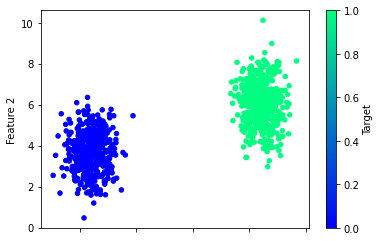

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()


In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5067
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5093
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5093
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5667
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.6120
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6293
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.6520
Epoch 8/100
24/24 [==============================] - 0s 956us/step - loss: 0.6737 - accuracy: 0.6667
Epoch 9/100
24/24 [==============================] - 0s 751us/step - loss: 0.6679 - accuracy: 0.6773
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.7000
Epoch

24/24 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9920
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1374 - accuracy: 0.9920
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.9933
Epoch 85/100
24/24 [==============================] - 0s 997us/step - loss: 0.1318 - accuracy: 0.9933
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9933
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.9933
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.9933
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.9947
Epoch 90/100
24/24 [==============================] - 0s 997us/step - loss: 0.1192 - accuracy: 0.9960
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.9960
Epoch 92/

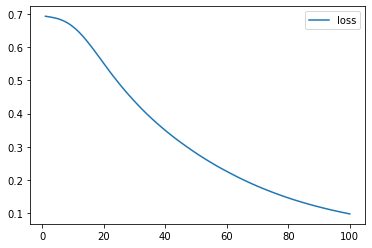

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

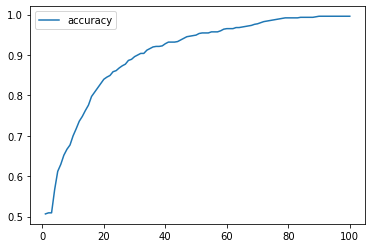

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0966 - accuracy: 1.0000
Loss: 0.09655366837978363, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

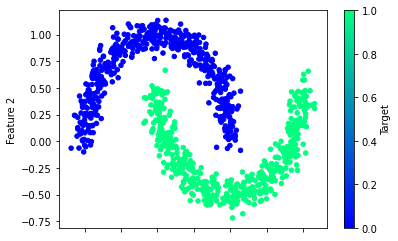

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.3676 - accuracy: 0.3520
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2140 - accuracy: 0.3680
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1114 - accuracy: 0.3840
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0427 - accuracy: 0.4067
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9877 - accuracy: 0.4213
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9463 - accuracy: 0.4320
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9126 - accuracy: 0.4413
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8824 - accuracy: 0.4520
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8560 - accuracy: 0.4587
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8326 - accuracy: 0.4733
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8280
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8293
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8320
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8333
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8373
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8400
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8427
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8467
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8493
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8507
Epoch 93/100


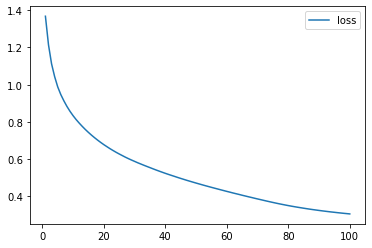

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


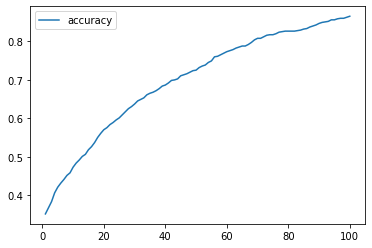

In [19]:
# Plot the loss
history_df.plot(y="accuracy")


In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()


In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.5947
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6398 - accuracy: 0.8373
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.8653
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5920 - accuracy: 0.8760
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5677 - accuracy: 0.8827
Epoch 6/100
24/24 [==============================] - 0s 997us/step - loss: 0.5429 - accuracy: 0.8920
Epoch 7/100
24/24 [==============================] - 0s 956us/step - loss: 0.5176 - accuracy: 0.8920
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.8920
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.8933
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8973
Epoch

24/24 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.9093
Epoch 83/100
24/24 [==============================] - 0s 956us/step - loss: 0.2217 - accuracy: 0.9093
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9080
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9067
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.9067
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2201 - accuracy: 0.9067
Epoch 88/100
24/24 [==============================] - 0s 997us/step - loss: 0.2196 - accuracy: 0.9067
Epoch 89/100
24/24 [==============================] - 0s 956us/step - loss: 0.2193 - accuracy: 0.9067
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2189 - accuracy: 0.9080
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2187 - accuracy: 0.9080
Epoch 9